In [1]:
from sklearn import neighbors, datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [5]:
iris = datasets.load_iris()

In [12]:
X = iris.data[:, :2]
y = iris.target

In [15]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(X, y)

KNeighborsClassifier()

In [16]:
y_pred = clf.predict(X)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]], dtype=int64)

### Cross-validation을 활용한 최적의 k 찾기

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
k_range = range(1, 100)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

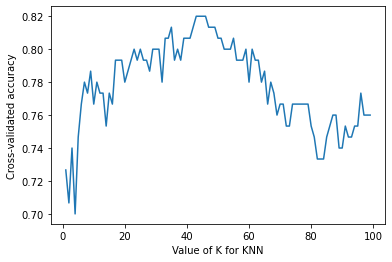

In [25]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

### Weight를 준 kNN

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_17520/1235423562.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmp_light)
C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_17520/1235423562.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmp_light)


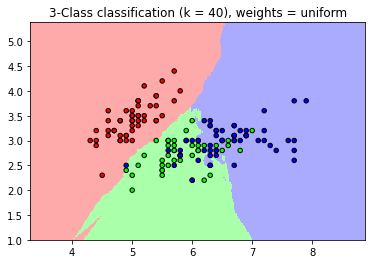

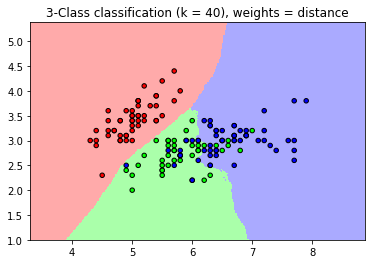

In [29]:
n_neighbors = 40
h = .02 # step size in the mesh

cmp_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmp_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmp_light)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmp_bold, edgecolors='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-Class classification (k = {n_neighbors}), weights = {weights}')
    
plt.show()

In [42]:
np.random.seed(0)
X = np.sort(5*np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5-np.random.rand(8))

In [44]:
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_ = knn.fit(X, y).predict(T)

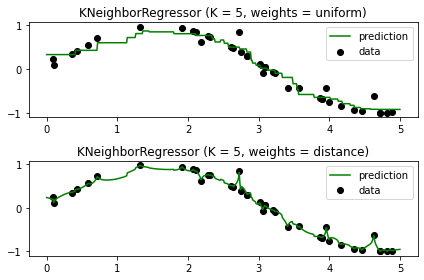

In [47]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)
    
    plt.subplot(2, 1, i+1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title(f'KNeighborRegressor (K = {n_neighbors}, weights = {weights})')
    
plt.tight_layout()
plt.show()